# BGGN 212 Co-evolution Project

In [22]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import parser

In [2]:
def coEvo(X,Y,expr1,expr2,expr3,expr4,_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t):
    
    count1=1;
    # initialize Numpy array
    data = np.zeros((100000,3))
    mutrate1a = np.zeros((100000,1))
    mutrate1s = np.zeros((100000,1))
    mutrate2a= np.zeros((100000,1))
    mutrate2s= np.zeros((100000,1))
    
    #add first data
    data[0,:]=[t, X, Y]
    
    # Main loop
    while t < T and ((count1)<100000):
        if (X <= 0) | (Y<=0):
            break
            
        rate1 = parser.expr(expr1).compile()
        rate2= parser.expr(expr2).compile()
        rate3 = parser.expr(expr3).compile()
        rate4= parser.expr(expr4).compile()
              
        u1a =eval(rate1)
        u1s =eval(rate2)
        u2a =eval(rate3)
        u2s =eval(rate4)
        
#         u1a =num1-(X*_alpha1)
#         u1s =num2-(X *_beta1) 
#         u2a =num1-(Y *_alpha2) 
#         u2s =num2-(Y *_beta2)

        if u1a <0:
            u1a=0
        if u1s<0:
            u1s=0
        if u2a <0:
            u2a=0
        if u2s<0:
            u2s=0   
        
        mutrate1a[count1-1]=u1a
        mutrate1s[count1-1]=u1s
        mutrate2a[count1-1]=u2a
        mutrate2s[count1-1]=u2s

        W = u1a + u1s+ u2a+ u2s
        if W == 0: break
            
        # time point at which evolution happens
        dt = -math.log(random.uniform(0.0, 1.0))/W
        t = t + dt

        # make adjustment of comapring which is small and use in place of u1s
        rand=random.uniform(0.0, 1.0)
        if rand < u1a / W:
            #A1 deleterious mutation in Y
            X = X + 1
            Y = Y - 1
        elif rand < (u1a+u1s) / W:
            #S1 beneficial mutation in Y
            X = X + 1
            Y = Y + 1
        elif rand<(u1a+u1s+u2a)/W:
            #A2 
            X = X - 1
            Y = Y + 1
        else:
            #S2
            X = X + 1
            Y = Y + 1     

        data[count1,:]=[t, X, Y]
        count1+=1
             
    # cutting unused 0s    
    data=data[0:count1,:]
    mutrate2a=mutrate2a[0:count1-1]
    mutrate2s=mutrate2s[0:count1-1]
    mutrate1a=mutrate1a[0:count1-1]
    mutrate1s=mutrate1s[0:count1-1]
    
    # Ploting
    fig,ax=plt.subplots(1,4, figsize = (30, 10))
    ax[0].plot(data[:,1],data[:,2])
    ax[0].set_xlabel('Species 1')
    ax[0].set_ylabel('Species 2')


    figure1=ax[1].plot(data[:,0],data[:,1],data[:,0],data[:,2])
    ax[1].legend(figure1, ('Species 1','Species 2'))
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Species')

    figure2=ax[2].plot(data[np.arange(0,(count1-1)),0],mutrate1a,data[np.arange(0,(count1-1)),0],mutrate1s)
    ax[2].set_xlabel('Time')
    ax[2].set_ylabel('Mutation rates species 1')
    ax[2].legend(figure2, ('Rate 1a','Rate1s'))

    figure3=ax[3].plot(data[np.arange(0,(count1-1)),0],mutrate2a,data[np.arange(0,(count1-1),1),0],mutrate2s)
    ax[3].set_xlabel('Time')
    ax[3].set_ylabel('Mutation rates species 2')
    ax[3].legend(figure3,('Rate 2a','Rate2s'))
    return;

In [161]:
def coEvoAvg_N(N,X,Y,expr1,expr2,expr3,expr4,_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t):                    
    #h=0.1
    namespace = globals()   
    for i in range(1, N):
        count1=1;
        namespace['data_%d' % i]= np.zeros((100000,3))
        namespace['data_%d' % i][0,:]=[t, X, Y]
        # initialize Numpy array
        data = np.zeros((100000,3))
        mutrate1a = np.zeros((100000,1))
        mutrate1s = np.zeros((100000,1))
        mutrate2a= np.zeros((100000,1))
        mutrate2s= np.zeros((100000,1))
        #add first data
        data[0,:]=[t, X, Y]
        print(data[1,1])

        # Main loop
        while t < T and ((count1)<100000):
            if (X <= 0) | (Y<=0):
                break

            rate1 = parser.expr(expr1).compile()
            rate2= parser.expr(expr2).compile()
            rate3 = parser.expr(expr3).compile()
            rate4= parser.expr(expr4).compile()

            u1a =eval(rate1)
            u1s =eval(rate2)
            u2a =eval(rate3)
            u2s =eval(rate4)

    #         u1a =num1-(X*_alpha1)
    #         u1s =num2-(X *_beta1) 
    #         u2a =num1-(Y *_alpha2) 
    #         u2s =num2-(Y *_beta2)

            if u1a <0:
                u1a=0
            if u1s<0:
                u1s=0
            if u2a <0:
                u2a=0
            if u2s<0:
                u2s=0   

            mutrate1a[count1-1]=u1a
            mutrate1s[count1-1]=u1s
            mutrate2a[count1-1]=u2a
            mutrate2s[count1-1]=u2s

            W = u1a + u1s+ u2a+ u2s
            if W == 0: break

            # time point at which evolution happens
            dt = -math.log(random.uniform(0.0, 1.0))/W
            t = t + dt

            # make adjustment of comapring which is small and use in place of u1s
            rand=random.uniform(0.0, 1.0)
            if rand < u1a / W:
                #A1 deleterious mutation in Y
                X = X + 1
                Y = Y - 1
            elif rand < (u1a+u1s) / W:
                #S1 beneficial mutation in Y
                X = X + 1
                Y = Y + 1
            elif rand<(u1a+u1s+u2a)/W:
                #A2 
                X = X - 1
                Y = Y + 1
            else:
                #S2
                X = X + 1
                Y = Y + 1     

            data[count1,:]=[t, X, Y]
            count1+=1
            print(data[1,1])
                                                   
        # cutting unused 0s    
        data=data[0:count1,:]
        mutrate2a=mutrate2a[0:count1-1]
        mutrate2s=mutrate2s[0:count1-1]
        mutrate1a=mutrate1a[0:count1-1]
        mutrate1s=mutrate1s[0:count1-1]
    
        # Store this iteration    
        namespace['data_%d' % i] = data
        print(i)
        print(data[1,1])
        print(namespace['data_%d' % i][1,1])
        
        #del data
        
    # Average

     # Ploting
    #fig,ax=plt.subplots(1,4, figsize = (30, 10))
    #for i in range (1,N):
        #print(namespace['data_%d' % i][1,1])
        #ax[0].plot(namespace['data_%d' % i][:,1],namespace['data_%d' % i][:,2])  
    #ax[0].set_xlabel('Species 1')
    #ax[0].set_ylabel('Species 2')
    
    plt.plot(data_1[:,1],data_1[:,2])
    plt.plot(data_2[:,1],data_2[:,2])
    plt.plot(data_3[:,1],data_3[:,2])

#     i=1
#     figure1=ax[1].plot(namespace['data_%d' % i][:,0],namespace['data_%d' % i][:,1],
#                    namespace['data_%d' % i][:,0],namespace['data_%d' % i][:,2])
#     for i in range (2,N):
#         ax[1].plot(namespace['data_%d' % i][:,0],namespace['data_%d' % i][:,1],
#                    namespace['data_%d' % i][:,0],namespace['data_%d' % i][:,2])
        
#     ax[1].legend(figure1, ('Species 1','Species 2'))
#     ax[1].set_xlabel('Time')
#     ax[1].set_ylabel('Species')

#     figure2=ax[2].plot(data[np.arange(0,(count1-1)),0],mutrate1a,data[np.arange(0,(count1-1)),0],mutrate1s)
#     ax[2].set_xlabel('Time')
#     ax[2].set_ylabel('Mutation rates species 1')
#     ax[2].legend(figure2, ('Rate 1a','Rate1s'))

#     figure3=ax[3].plot(data[np.arange(0,(count1-1)),0],mutrate2a,data[np.arange(0,(count1-1),1),0],mutrate2s)
#     ax[3].set_xlabel('Time')
#     ax[3].set_ylabel('Mutation rates species 2')
#     ax[3].legend(figure3,('Rate 2a','Rate2s'))     

    return;

Text(0, 0.5, 'Species 2')

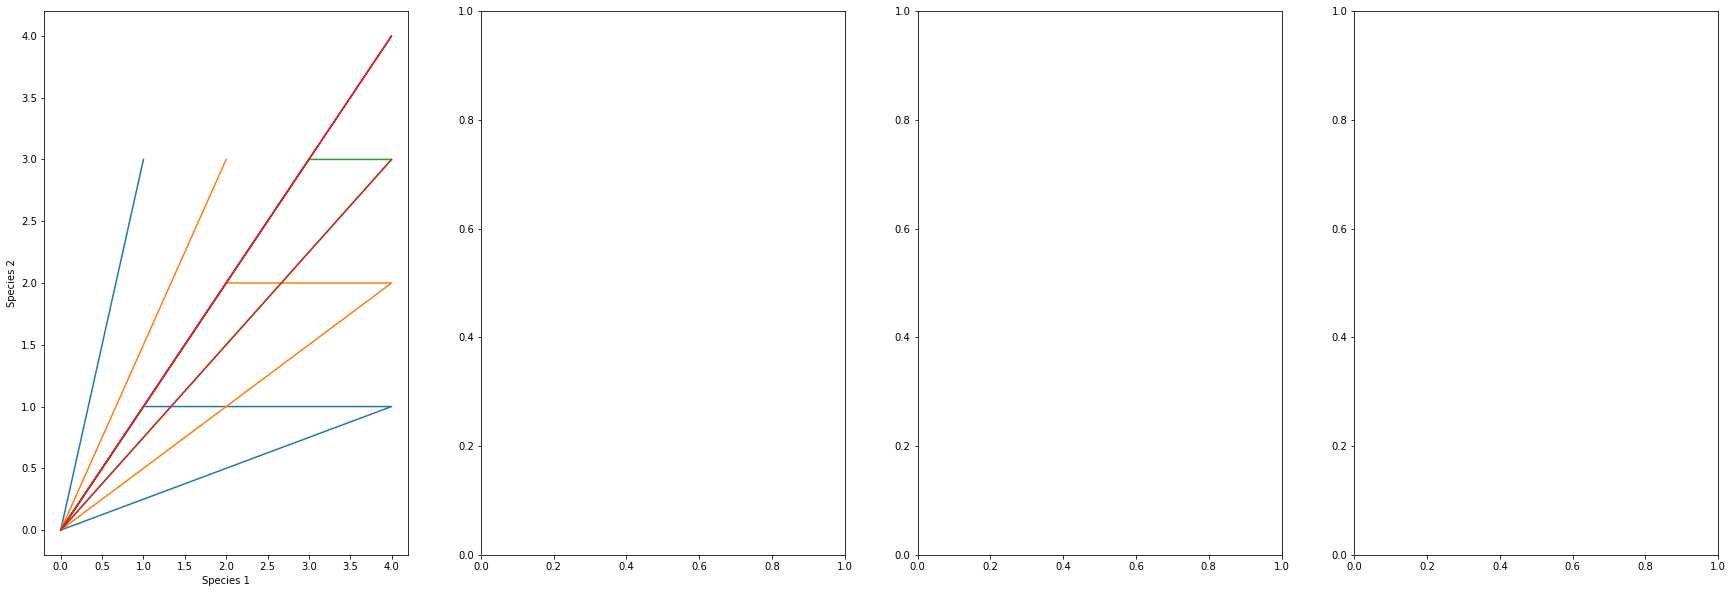

In [155]:
N=5
namespace = globals()
fig,ax=plt.subplots(1,4, figsize = (30, 10))
for i in range(1, N):
    namespace['data_%d' % i]= np.zeros((10,3))
    namespace['data_%d' % i][0,:]=[1, i, 3]
    namespace['data_%d' % i][2,:]=[1, 4, i]
    namespace['data_%d' % i][3,:]=[1, i, i]
    ax[0].plot(namespace['data_%d' % i][:,1],namespace['data_%d' % i][:,2])
    
ax[0].set_xlabel('Species 1')
ax[0].set_ylabel('Species 2')


## I. All u are the same. 
### (1.) No a (antagonistic) mutations

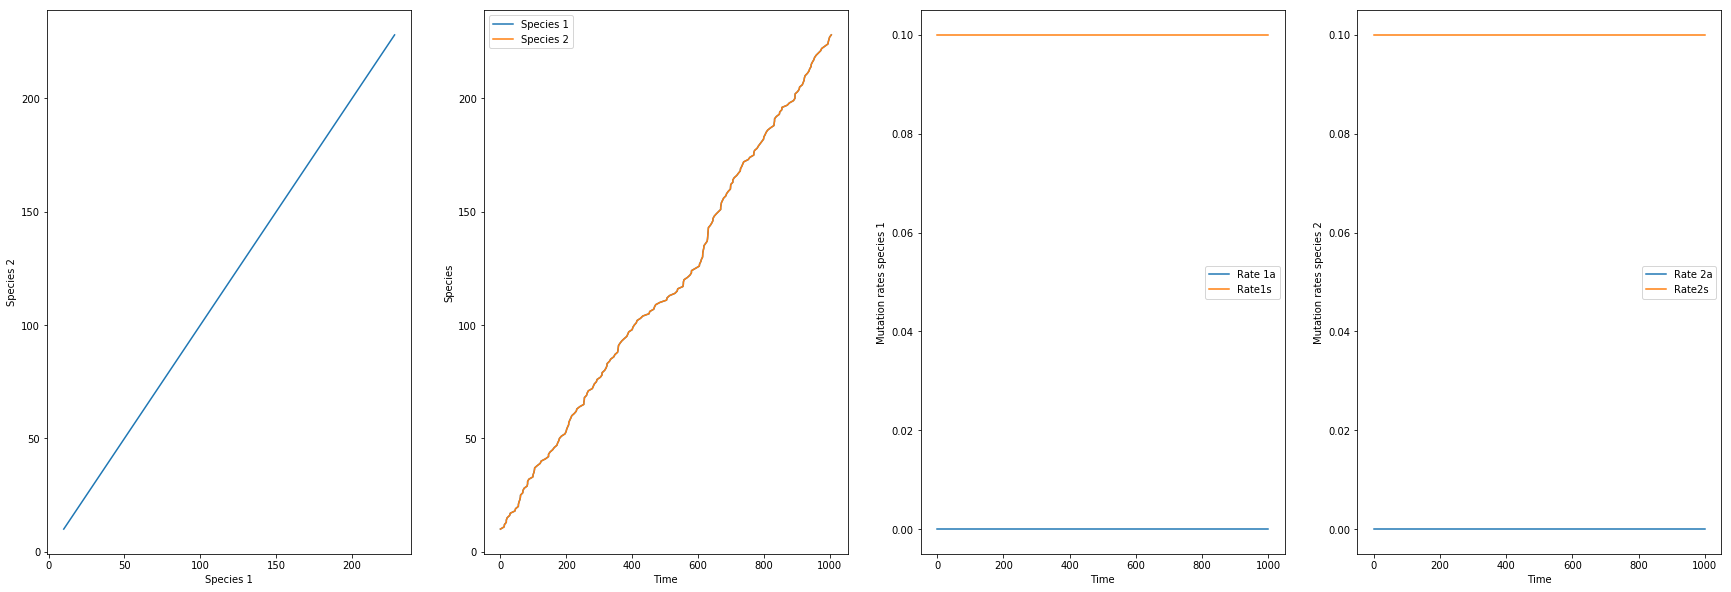

In [110]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0
u1s=0.1
u2a=0
u2s=0.1
num1=0  # not needed
num2=0 

coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

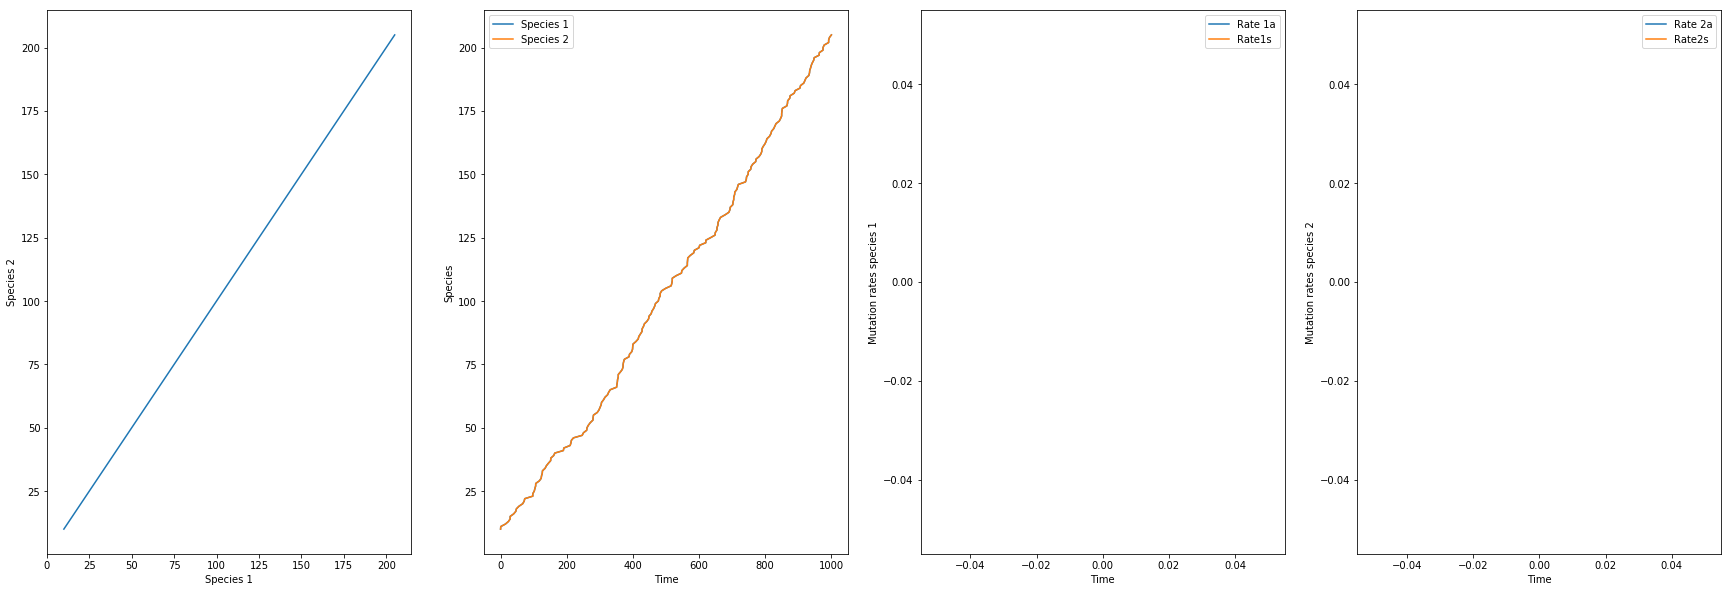

In [111]:
coEvoAvg_N(5,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

## I. All u are the same. 
### (2.) No s(synergistic) mutations

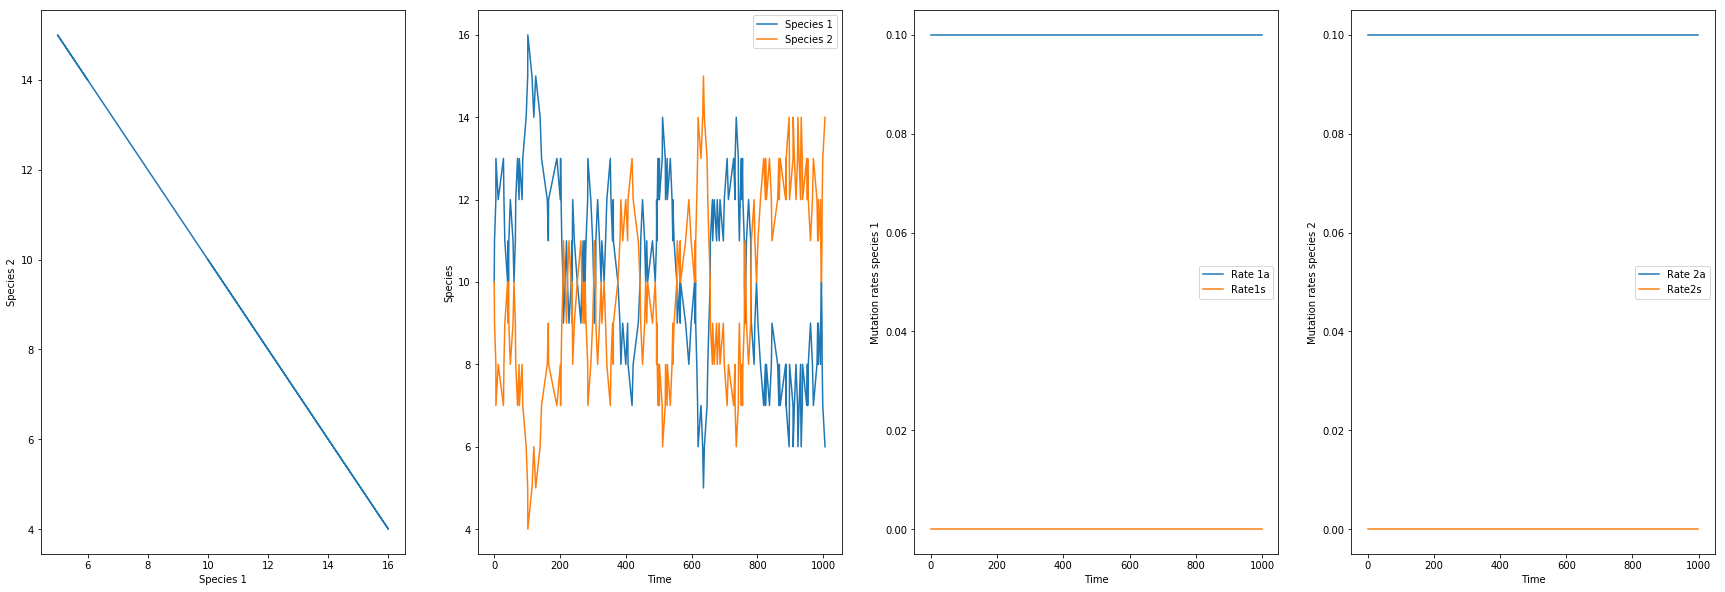

In [112]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0.1
u1s=0
u2a=0.1
u2s=0

coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

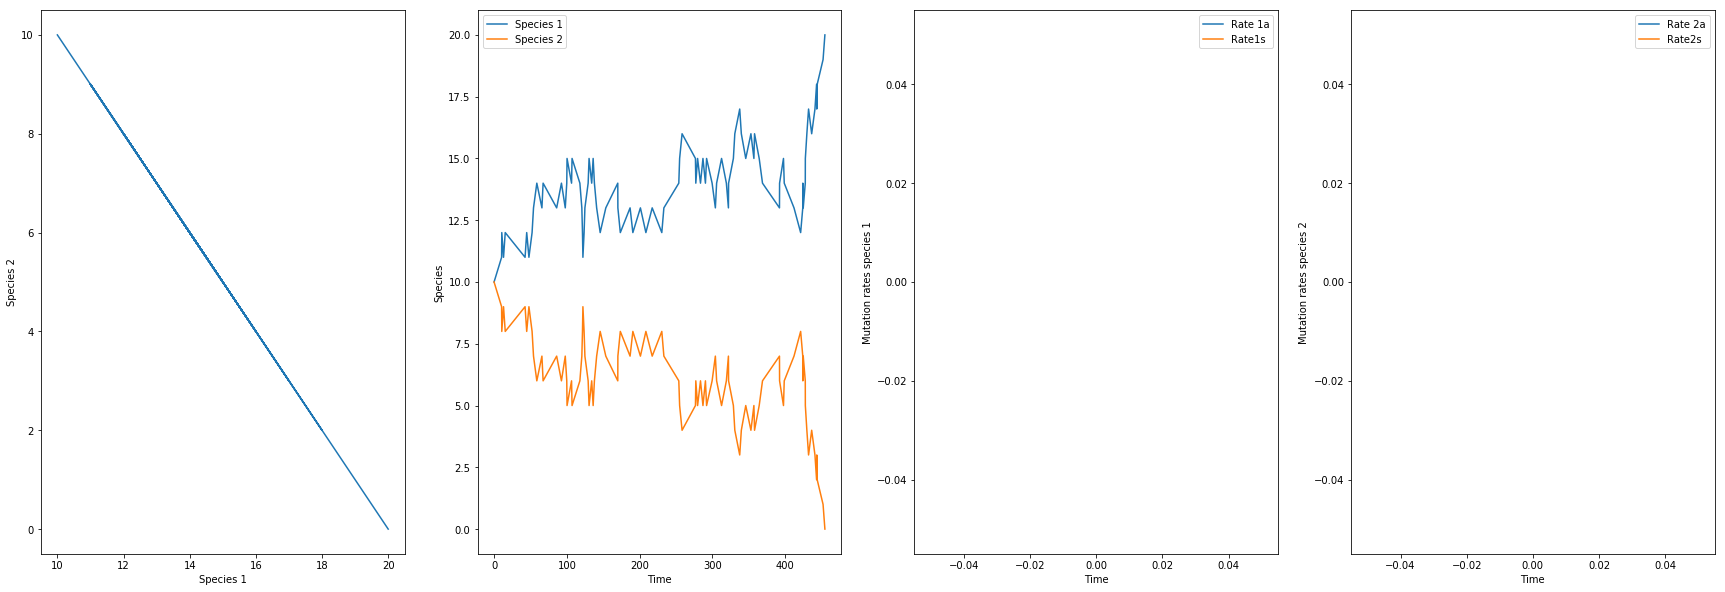

In [113]:
coEvoAvg_N(5,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

## I. All u are the same. 
### (3.) 50% - 50% a and s.

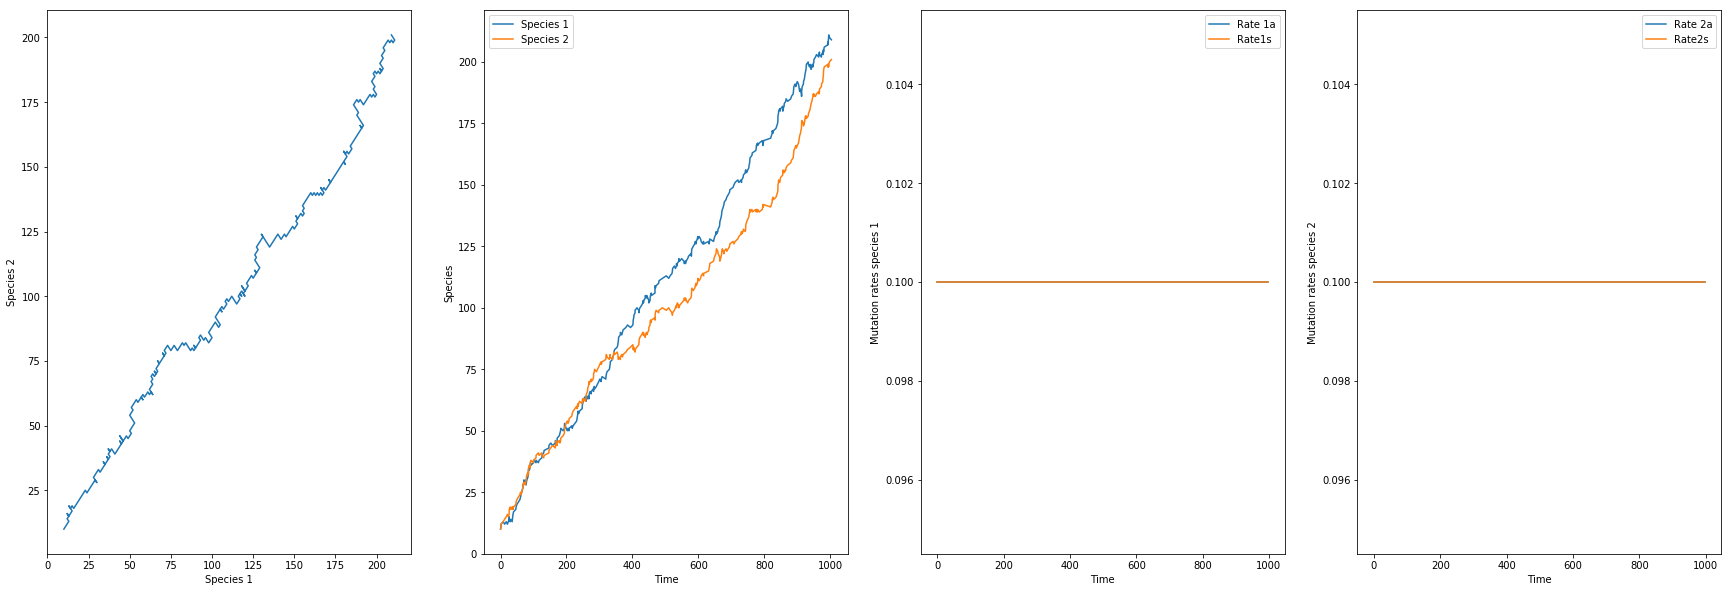

In [157]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0.1
u1s=0.1
u2a=0.1
u2s=0.1

coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

In [162]:
coEvoAvg_N(5,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

0.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
1

IndexError: index 1 is out of bounds for axis 0 with size 1

## II. Species are symmetric but vary rates of a and s mutations. (No dependence of fitness)
### Case 1: High a (antagonistic) mutations , Low s (synergistic) mutations

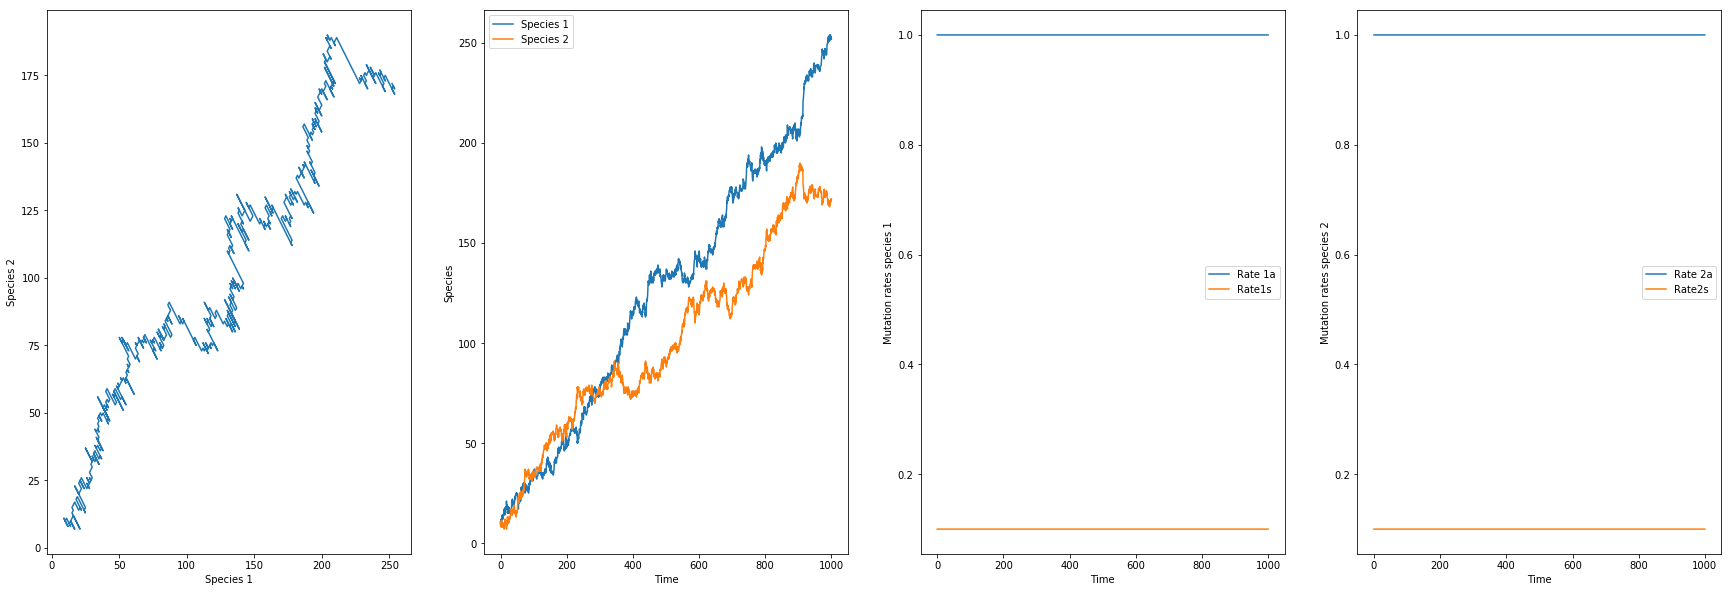

In [6]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=1
u1s=0.1
u2a=1
u2s=0.1

coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

## II. Species are symmetric but vary rates of a and s mutations. (No dependence of fitness)
### Case 2: Low a (antagonistic) mutations , High s (synergistic) mutations

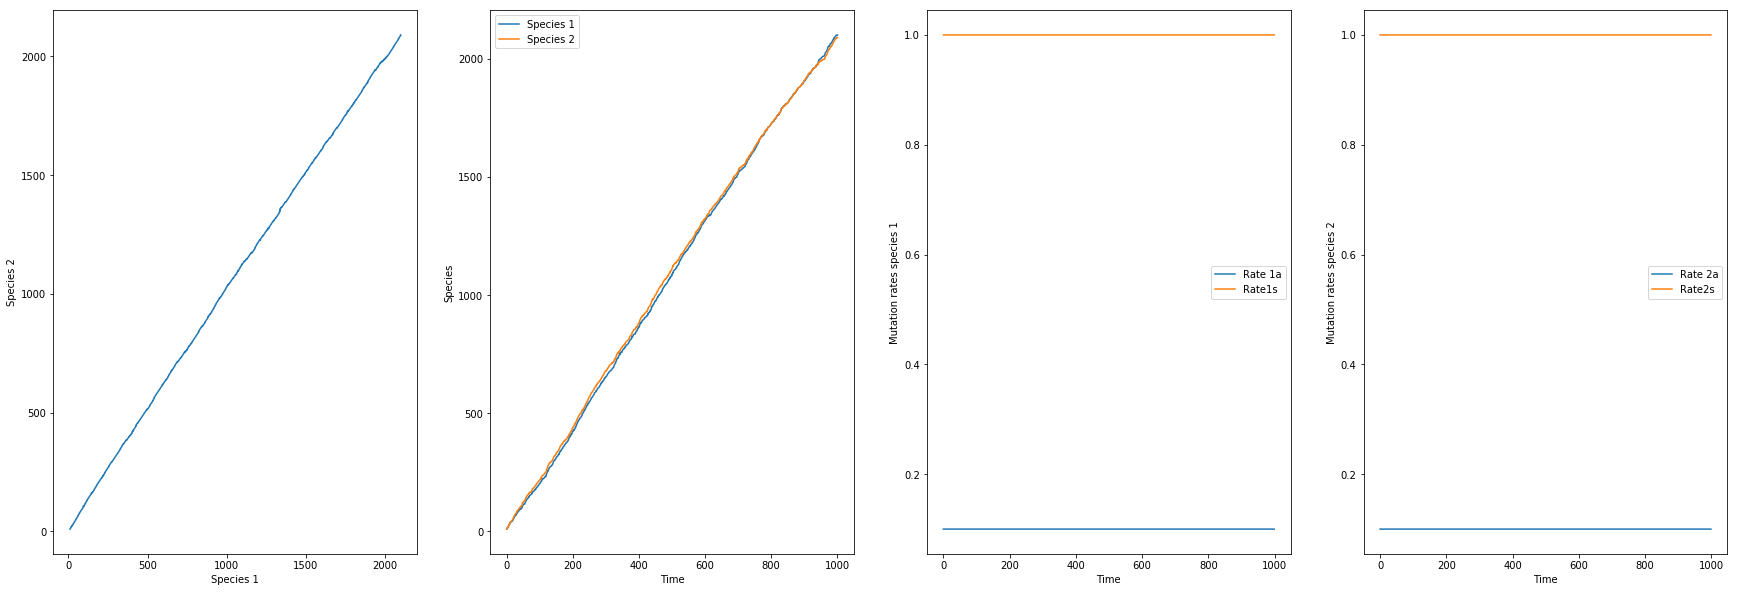

In [7]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0.1
u1s=1
u2a=0.1
u2s=1

coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

## III. Species are symmetric. And rates depend on fitness. Keep slopes the same

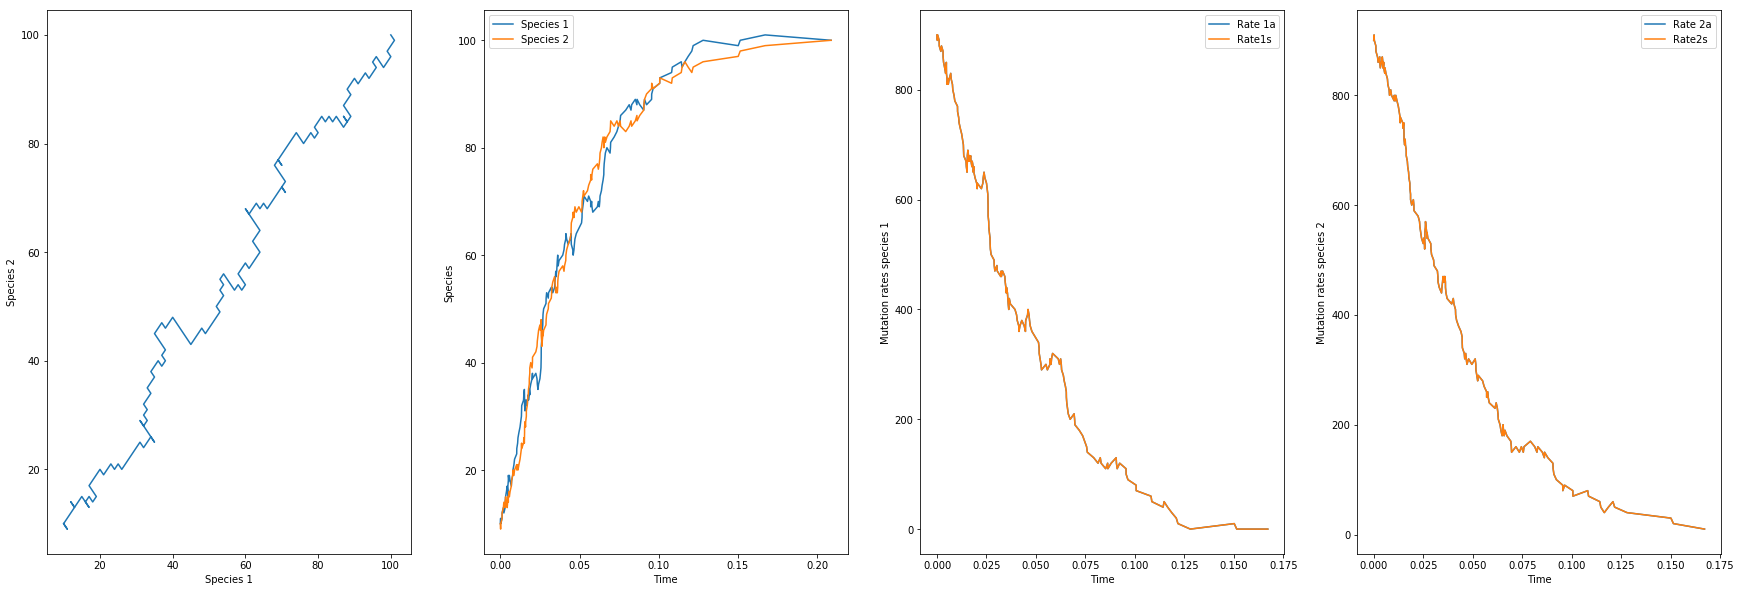

In [8]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 10
_beta1 = 10
_alpha2 = 10
_beta2 = 10

num1=1000
num2=1000

coEvo(X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#         u1a =num1-(X *_alpha1)
#         u1s =num1-(X *_beta1) 
#         u2a =num2-(Y *_alpha2) 
#         u2s =num2-(Y *_beta2)

## IV. Species are symmetric. Mutation rates are different between a and s.
### Case 1: High a (antagonistic) mutations , Low s (synergistic) mutations

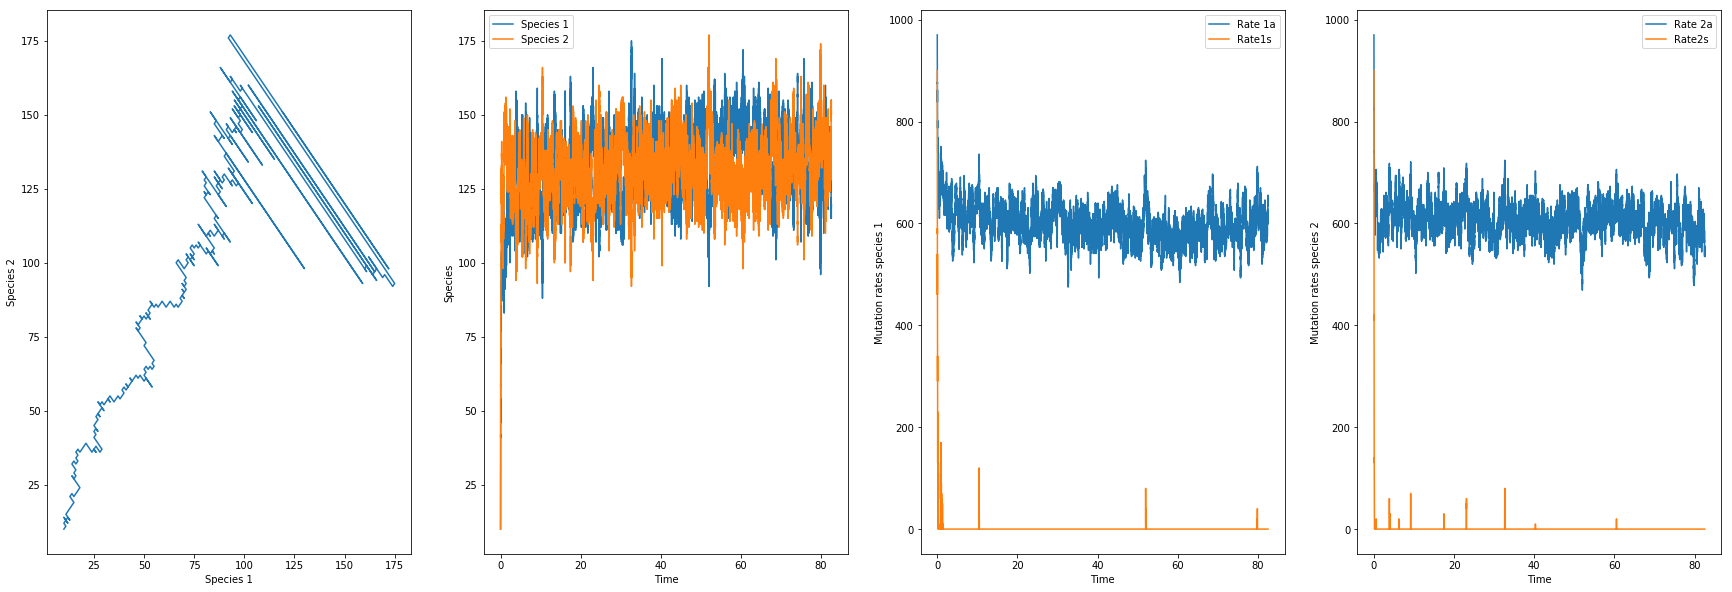

In [9]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 3#antagonistic 1 thereofore slow decrease with respect to X
_beta1 = 10 #synergistic
_alpha2 = 3
_beta2 = 10

num1=1000
num2=1000

coEvo(X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#         u1a =num1-(X *_alpha1)
#         u1s =num1-(X *_beta1) 
#         u2a =num2-(Y *_alpha2) 
#         u2s =num2-(Y *_beta2)

## IV. Species are symmetric. Slopes are different between a and s.
### Case 2: Low a (antagonistic) mutations , High s (synergistic) mutations

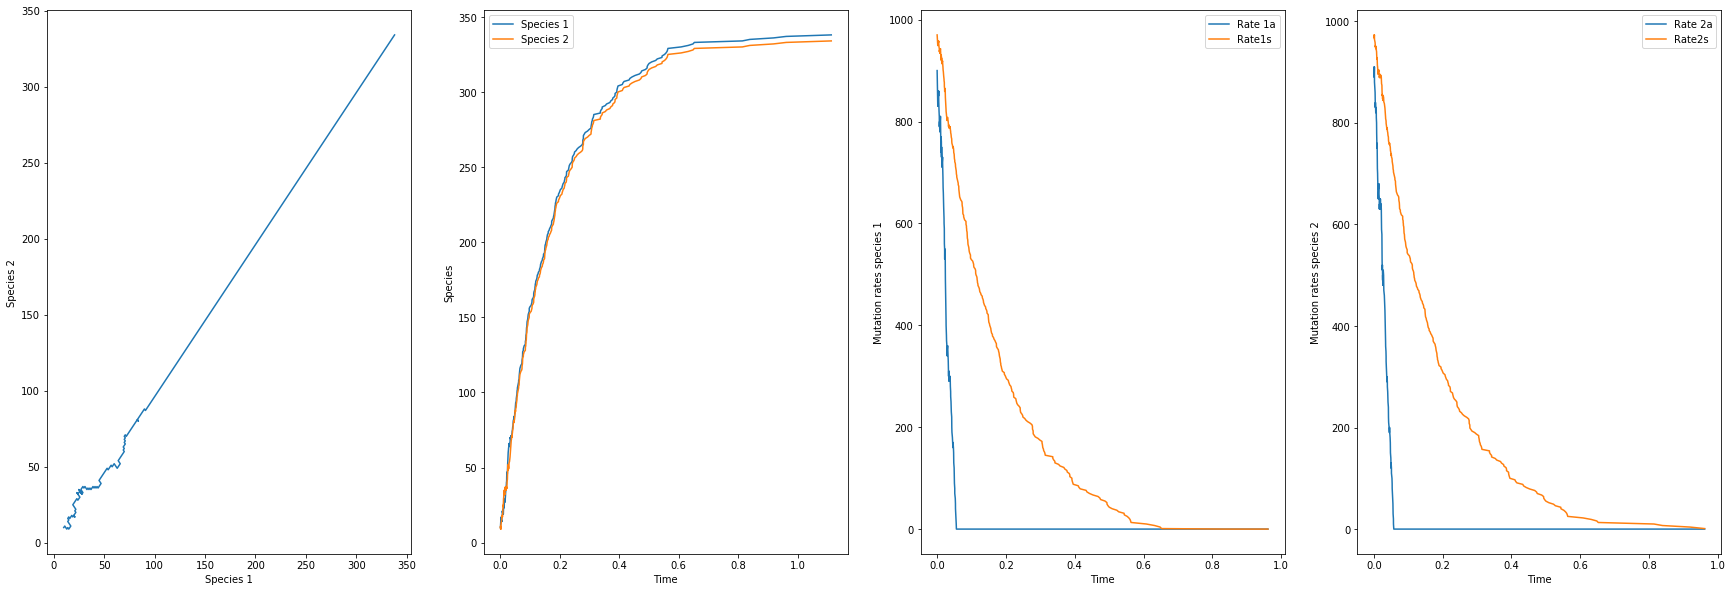

In [10]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 10
_beta1 = 3
_alpha2 = 10
_beta2 = 3

num1=1000
num2=1000

coEvo(X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#         u1a =num-(X *_alpha1)
#         u1s =num-(X *_beta1) 
#         u2a =num-(Y *_alpha2) 
#         u2s =num-(Y *_beta2)

### Case 3: Slopes depend on fitness such that they are dependent on time such that there is an interesection between these 2

#### Synergistic more later on

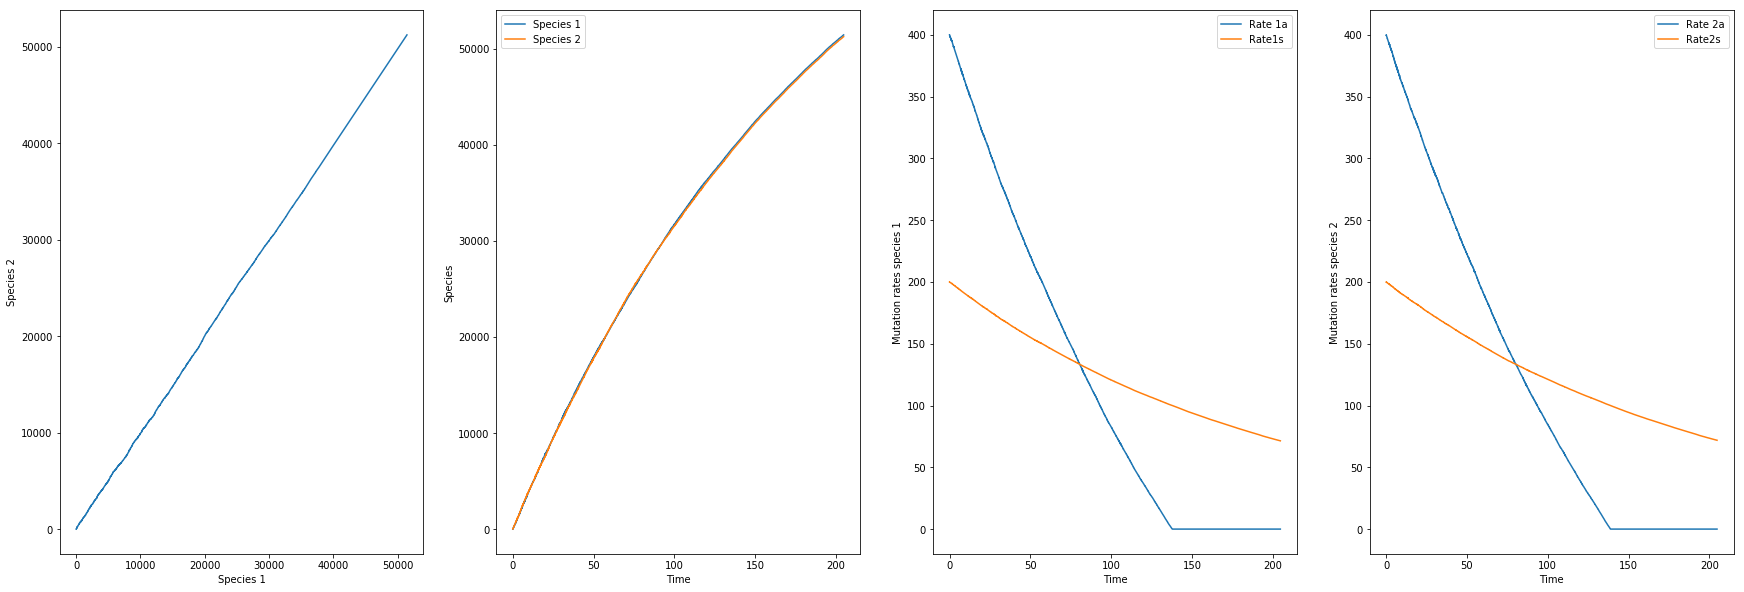

In [11]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.01
_beta1=0.0025
_alpha2=0.01
_beta2=0.0025
num1=400
num2=200

coEvo(X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#### Antagonist more


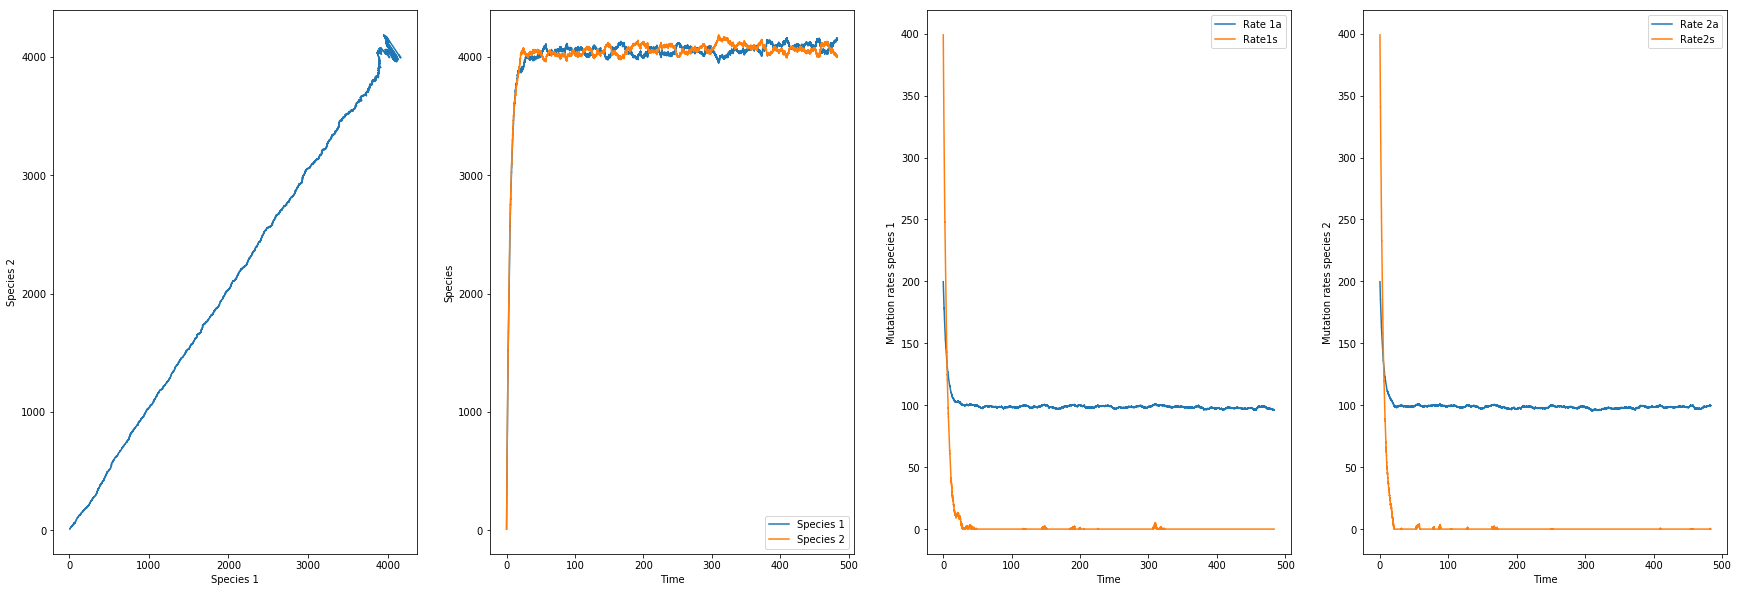

In [12]:
# Input parameters #################### Antagonist more
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.025
_beta1=0.1
_alpha2=0.025
_beta2=0.1
num2=400
num1=200

coEvo(X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

## V. Species are different.
### Case 1.I: All u are the same. this does not exist


### Case 2.I: No a (antagonistic) mutations for one and no synergistic mutation for other

In [13]:
# # Input parameters ####################
# # int; total population
# X = 10
# Y = 10

# # float; maximum elapsed time
# T = 1000.0 
# # float; start time
# t = 0.0

# u1a=0
# u1s=0.1
# u2a=0.1
# u2s=0
# num1=0
# num2=0


# coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 3.I: No a (antagonistic) mutations for one and 50 50 synergistic antagonist mutation for other

In [14]:
# # Input parameters ####################
# # int; total population
# X = 10
# Y = 10
# # float; maximum elapsed time
# T = 1000.0 
# # float; start time
# t = 0.0

# u1a=0
# u1s=0.1
# u2a=0.1
# u2s=0.1
# num1=0
# num2=0


# coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 4.I: No a (antagonistic) mutations for one and synergistic more than antagonist mutation for other

In [15]:
# # Input parameters ####################
# # int; total population
# X = 10
# Y = 10
# # float; maximum elapsed time
# T = 1000.0 
# # float; start time
# t = 0.0

# u1a=0
# u1s=0.1
# u2a=0.02
# u2s=0.08


# coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 4.I: No a (antagonistic) mutations for one and synergistic more than antagonist mutation for other

In [16]:
# # Input parameters ####################
# # int; total population
# X = 10
# Y = 10
# # float; maximum elapsed time
# T = 1000.0 
# # float; start time
# t = 0.0

# u1a=0
# u1s=0.1
# u2a=0.02
# u2s=0.08

# coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 5.I: No a (antagonistic) mutations for one and dependent on fitness for other,antagonist rate more later on

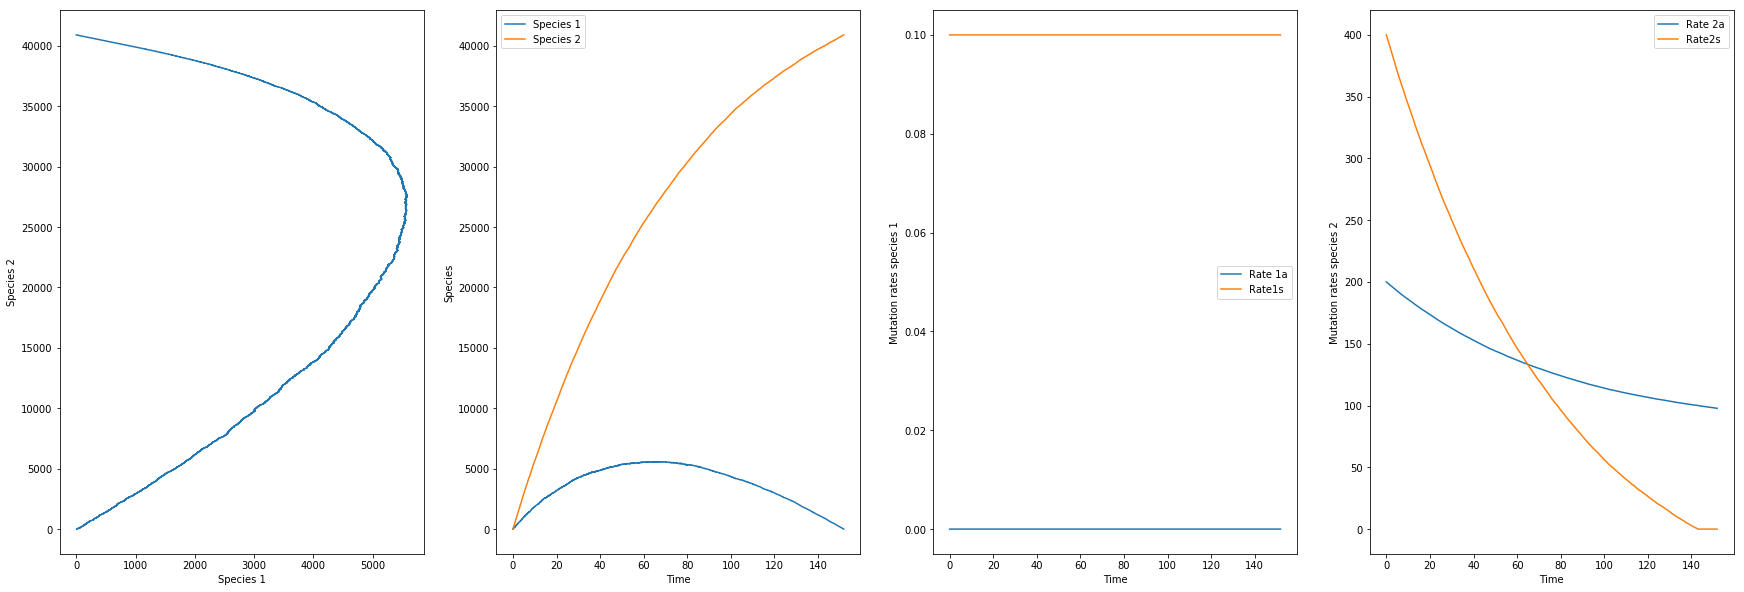

In [17]:
# Input parameters #################### Antagonist more
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.0
_beta1=0.1
_alpha2=0.0025
_beta2=0.01
num2=400
num1=200

coEvo(X,Y,"_alpha1","_beta1","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

### Case 5.I: No a (antagonistic) mutations for one and dependent on fitness for other,synergistic more later on

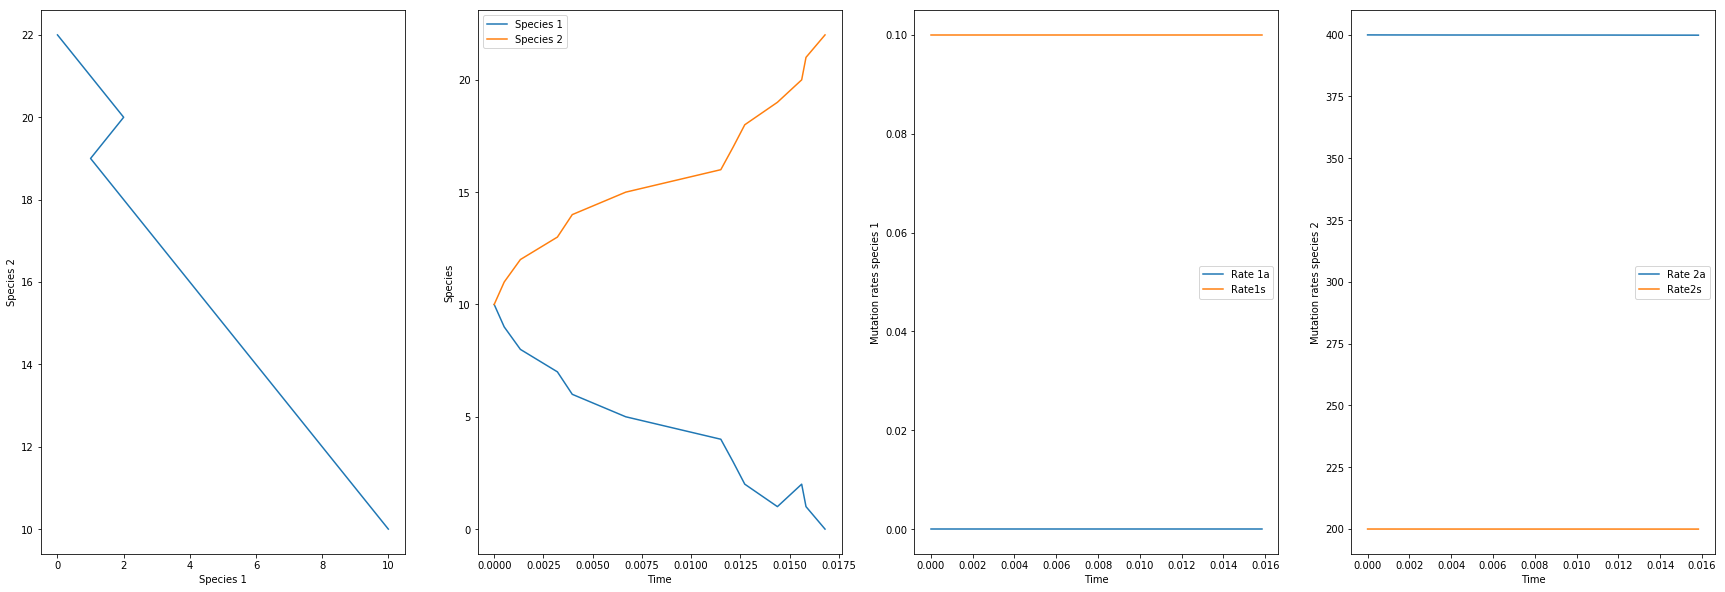

In [18]:
# Input parameters #################### Antagonist more
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.0
_beta1=0.1
_alpha2=0.01
_beta2=0.0025
num1=400
num2=200

coEvo(X,Y,"_alpha1","_beta1","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

### Case 6.I: No s (synergistic) mutations for one and 50 percent antagonist and synergistic for other 

In [19]:
# # Input parameters ####################
# # int; total population
# X = 10
# Y = 10
# # float; maximum elapsed time
# T = 1000.0 
# # float; start time
# t = 0.0

# u1a=0.1
# u1s=0
# u2a=0.1
# u2s=0.1
# num1=0
# num2=0


# coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 6.I: No s (synergistic) mutations for one and antagonist more later on

In [20]:
# # Input parameters #################### Antagonist more
# # int; total population
# X = 10
# Y = 10

# # float; maximum elapsed time
# T = 1000.0 
# # float; start time
# t = 0.0

# _alpha1=0.1
# _beta1=0.0
# _alpha2=0.0025
# _beta2=0.01
# num2=400
# num1=200

# coEvo(X,Y,"_alpha1","_beta1","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

### Case 6.I: No s (synergistic) mutations for one and synergistic more later on for other

In [21]:
# # Input parameters #################### Antagonist more
# # int; total population
# X = 10
# Y = 10

# # float; maximum elapsed time
# T = 1000.0 
# # float; start time
# t = 0.0

# _alpha1=0.1
# _beta1=0.0
# _alpha2=0.01
# _beta2=0.0025
# num1=400
# num2=200

# coEvo(X,Y,"_alpha1","_beta1","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)